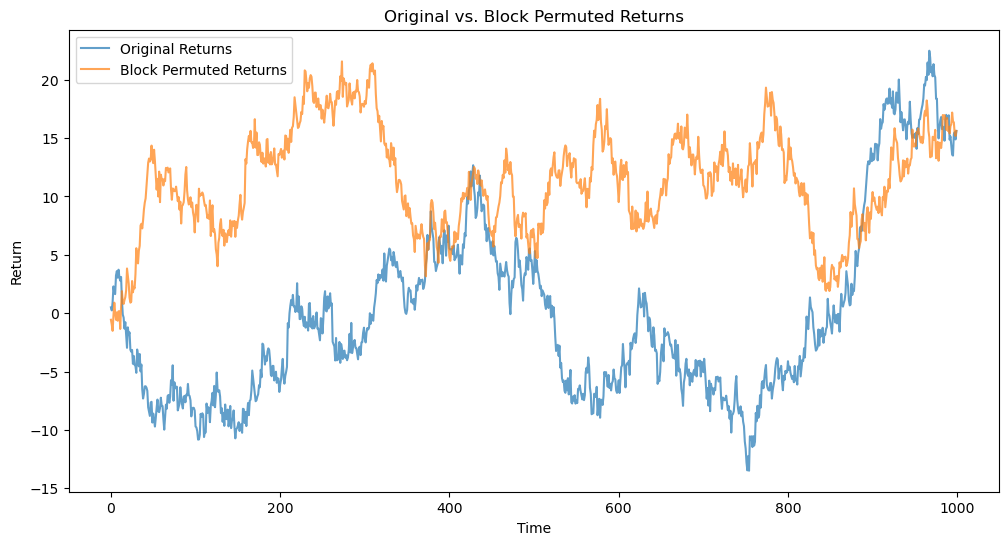

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ar1_returns(n, phi=-0.25, mu=0, sigma=1):
    """
    Generate n returns from an AR(1) process:
    r_t = mu + phi * r_(t-1) + epsilon_t, where epsilon_t ~ N(0, sigma)
    
    Parameters:
        n (int): Number of observations.
        phi (float): AR(1) parameter (autocorrelation at lag 1).
        mu (float): Mean of the process.
        sigma (float): Standard deviation of the noise.
    
    Returns:
        np.ndarray: Array of generated returns.
    """
    returns = np.zeros(n)
    epsilon = np.random.normal(0, sigma, n)
    returns[0] = epsilon[0]  # starting value, can be set to mu if preferred
    
    for t in range(1, n):
        returns[t] = mu + phi * returns[t-1] + epsilon[t]
    
    return returns

def random_block_permutation(series, block_size):
    """
    Permute the series by dividing it into blocks of a specified size and shuffling the blocks.
    
    Parameters:
        series (np.ndarray): Input time series.
        block_size (int): Size of each block.
    
    Returns:
        np.ndarray: The block-permuted time series.
    """
    n = len(series)
    # Split the series into blocks
    blocks = [series[i:i+block_size] for i in range(0, n, block_size)]
    # Shuffle the blocks randomly
    np.random.shuffle(blocks)
    # Concatenate the blocks back into a single array
    permuted_series = np.concatenate(blocks)
    return permuted_series

# Example usage:
np.random.seed(42)  # for reproducibility
n = 1000                   # number of observations
returns = generate_ar1_returns(n, phi=-0.25, mu=0, sigma=1)

# Choose a block size for permutation; adjust as needed
block_size = 50
permuted_returns = random_block_permutation(returns, block_size)

# Optional: Plot the original and permuted series for visual comparison
plt.figure(figsize=(12, 6))
plt.plot(returns.cumsum(), label='Original Returns', alpha=0.7)
plt.plot(permuted_returns.cumsum(), label='Block Permuted Returns', alpha=0.7)
plt.legend()
plt.title('Original vs. Block Permuted Returns')
plt.xlabel('Time')
plt.ylabel('Return')
plt.show()
